In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('IONQ_Data.csv')
df.head()

,Date,Open_IONQ,High_IONQ,Low_IONQ,Close_IONQ,"Osc(5,15)_IONQ",Sig(9)_IONQ,Diff_IONQ,Volume_IONQ,UBB(2) - Upper Band_IONQ,...,SMAVG (200)_VIX_INDEX,Open_SPX,High_SPX,Low_SPX,Close_SPX,SMAVG (50)_SPX,SMAVG (100)_SPX,SMAVG (200)_SPX,Volume_SPX,SMAVG (15)_SPX
0,11/16/2023,12.79,12.790,12.0601,12.20,0.8427,0.3476,0.4950,7.568M,13.2506,...,17.05,4497.08,4511.99,4487.83,4508.24,4338.03,4407.35,4264.80,662.715M,678.399M
1,11/15/2023,12.81,13.580,12.2800,12.99,0.8007,0.1170,0.6836,12.077M,13.5036,...,17.07,4505.30,4521.17,4495.31,4502.88,4336.89,4406.05,4262.85,698.147M,687.498M
2,11/14/2023,11.87,12.735,11.6600,12.69,0.6573,-0.1610,0.8183,10.07M,13.6637,...,17.1,4458.97,4508.67,4458.97,4495.70,4336.14,4404.31,4260.72,726.301M,689.091M
3,11/13/2023,10.59,11.740,10.5300,11.55,0.5253,-0.4803,1.0056,12.006M,14.0432,...,17.12,4406.66,4421.76,4393.82,4411.55,4336.16,4402.84,4258.33,520.765M,683.106M
4,11/10/2023,11.27,11.270,10.1500,10.66,0.3847,-0.8215,1.2061,11.94M,14.4954,...,17.14,4364.15,4418.03,4353.34,4415.24,4338.25,4402.54,4256.63,633.185M,689.884M


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      703 non-null    object 
 1   Open_IONQ                                 703 non-null    float64
 2   High_IONQ                                 703 non-null    float64
 3   Low_IONQ                                  703 non-null    float64
 4   Close_IONQ                                703 non-null    float64
 5   Osc(5,15)_IONQ                            703 non-null    float64
 6   Sig(9)_IONQ                               703 non-null    float64
 7   Diff_IONQ                                 703 non-null    float64
 8   Volume_IONQ                               703 non-null    object 
 9   UBB(2) - Upper Band_IONQ                  703 non-null    float64
 10  BollMA (20) - Moving Average_IONQ     

Data Model Implementation (25 points)

In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your data loading code here (assuming 'df' is your DataFrame)

# Separate the y variable, the target variable (Close_IONQ)
y = df['Close_IONQ']

# Separate the X variable, the features
X = df.drop(columns=['Close_IONQ'])

# Get dummies for categorical variables if needed
# For simplicity, let's drop non-numeric columns for now
X = X.select_dtypes(include=['float64'])

# Split the data using train_test_split
# Assign a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Random Forest Regressor
model_rf = RandomForestRegressor(random_state=1)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Regressor:
Mean Squared Error: 0.33
R-squared: 0.99


Data is cleaned, normalized, and standardized prior to modeling (5 points)

In [29]:
# Check for missing values and handle them if needed
df.dropna(inplace=True)

# Normalize and standardize the data if needed (use appropriate methods based on your data)
# For example, you can use StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Overall model performance printed or displayed (10 points)

In [31]:
print("Overall Model Performance:")
print(f"Random Forest Regressor - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_rf:.2f}")
print(f"Linear Regression - Mean Squared Error: {mse_2:.2f}")
print(f"Linear Regression - R-squared: {r2_2:.2f}")


Overall Model Performance:
Random Forest Regressor - Mean Squared Error: 0.33
Random Forest Regressor - R-squared: 0.99
Linear Regression - Mean Squared Error: 0.18
Linear Regression - R-squared: 0.99


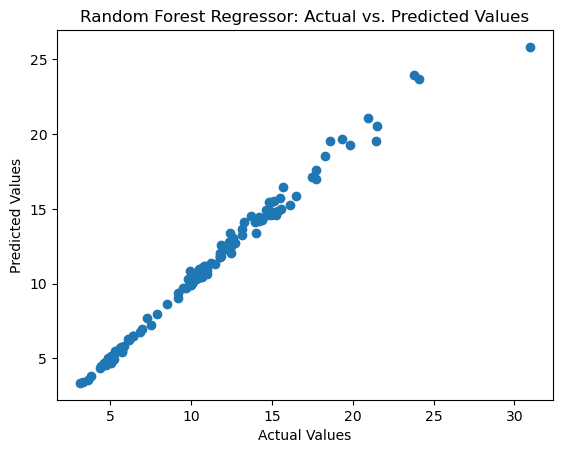

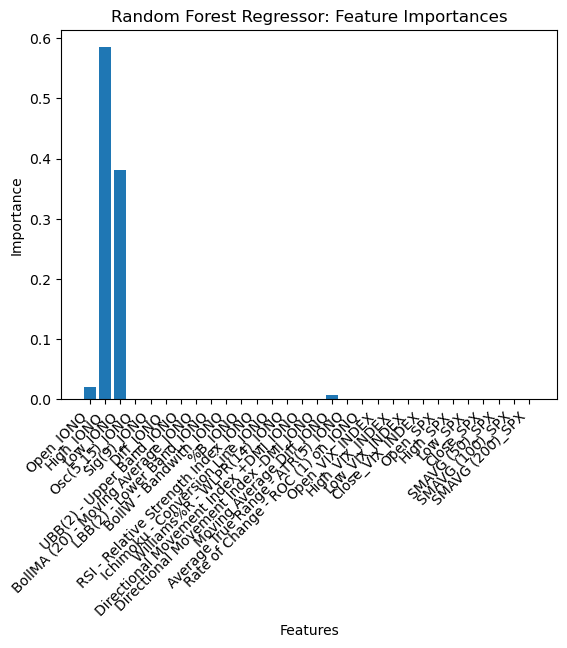

NameError: name 'np' is not defined

<Figure size 800x600 with 0 Axes>

In [33]:
from sklearn.model_selection import learning_curve

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs. Predicted Values")
plt.show()

# Visualize feature importances
feature_importances = model_rf.feature_importances_
features = X.columns

plt.bar(features, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Regressor: Feature Importances")
plt.xticks(rotation=45, ha='right')
plt.show()

# Learning curve for Random Forest Regressor
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=1), X, y, cv=5, scoring='r2', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel("Training Set Size")
plt.ylabel("R-squared Score")
plt.title("Random Forest Regressor: Learning Curve")
plt.legend()
plt.show()

